# Introduction to Machine Learning

## Linear Estimation

We'll first consider the case of simple linear regression. In its most basic formulation, it involves modelling a response variable as a linear combination of $n$ features (or predictive variables). Here we assume a total of $m$ observations:

$
Y = \beta_0 + \beta_1x_1 + \beta_1x_2 + ... + \beta_nx_n
$

If we adopt the convention that $x_0 = 1$, we can rewrite the equation as:

$
Y = \beta_0x_0 + \beta_1x_1 + \beta_1x_2 + ... + \beta_nx_n
$

This can be written in matrix form as:

$
Y = \beta^\top X
$

where

$
\beta_{(n+1)\times 1} = \begin{bmatrix} \beta_0\\ \beta_1 \\ \vdots \\ \beta_n\end{bmatrix}
$

$
X_{m\times (n+1)} = \begin{bmatrix} 
x_{01} & x_{02} & \ldots & x_{0m}\\ 
x_{11} & x_{12} & \ldots & x_{1m}\\ 
\vdots & \vdots & \vdots & \vdots\\
x_{n1} & x_{n2} & \ldots & x_{nm}\\ 
\end{bmatrix}
$

$\beta$ is an array with shape `(n+1, 1)` and $X$ is an array with shape `(n+1, m)`. Within the matrix X, the first subscript indicates the feature number, and the second subscript represents the observation number.

We will represent our linear estimator as:

$
h_\beta(x^{(i)}) = \beta^Tx^{(i)} = \beta_0x_{0i} + \beta_1x_{1i} + \ldots + \beta_n x_{m1}
$

We then choose a **cost function**, which gives a value associated with our estimator's performance on the dataset:

$
J(\beta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\beta(x^{\textrm{(i)}}) - y^{\textrm{(i)}})^2
$

We'll get more into the specifics of this choice later, but for now it suffices to note that the cost function is a well-behaved function that is minimized when our estimator is as accurate as possible (i.e. perfectly predicts the response variable for each observation).

## Gradient Descent

Gradient descent is a flexible and widely-used algorithm that is applied to iteratively update the coefficients of a model to obtain the best fit.

We'll take a look at the gradient descent optimization algorithm in the context of a simple linear dataset:

X shape: (100, 2)


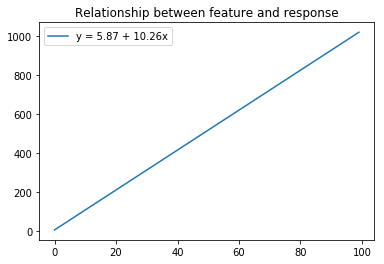

In [57]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# make results reproducible
np.random.seed(42)

# simulate X values
x0 = np.ones(100)
x1 = np.linspace(0, 99, 100)
X = np.array([x0, x1]).T
print(f'X shape: {X.shape}')

# simulate Y as a simple linear function
coeff0 = 5.87
coeff1 = 10.26
Y = coeff0 * x0 + coeff1 * x1
    
plt.plot(x1, Y, label = f'y = {coeff0} + {coeff1}x')
plt.title('Relationship between feature and response')
plt.legend();

Remember, we've chosen our loss function such that is it minimized by our best possible approximator. We can actually visualize our loss function as a suface in 3 dimensions, with the `x` and `y` coordinates corresponding to values of $\beta_0$ and $\beta_1$ respectively, and the `z` coordinate corresponding to loss values at specific choices of $\beta_0$ and $\beta_1$.

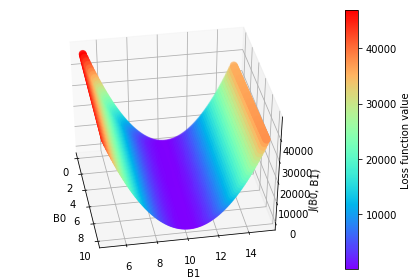

In [58]:
# define a vectorized cost function for plotting
def cost_function_vectorized(B0, B1):
    """
    Vectorized cost function.
    
    :param B0: first coefficient
    :param B0: seconds coefficient
    :returns: cost associated with B0, B1
    """
    B = np.array([B0, B1])
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J
cost_function_vectorized = np.vectorize(cost_function_vectorized)

def plot_3D(x, y, z, c, elev=40, azim=-10):
    """
    Plots a curve in 3D space, points coloured by c.
    """
    ax = plt.subplot(projection='3d')
    scatter = ax.scatter3D(x, y, z, c=c, s=50,
                           cmap=plt.cm.rainbow)
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('B0')
    ax.set_ylabel('B1')
    ax.set_zlabel('J(B0, B1)')
    cb = plt.colorbar(scatter)
    cb.ax.set_ylabel('Loss function value')
    plt.tight_layout()

# define plotting ranges for the coefficient and loss surface
coeff0_range = np.linspace(0, 10, 100)
coeff1_range = np.linspace(5, 15, 100)
coeff_ranges = np.array([coeff0_range, coeff1_range]).T
Xplot, Yplot = np.meshgrid(coeff0_range, coeff1_range)
loss_surface = cost_function_vectorized(Xplot, Yplot)

# plot the loss surface
plot_3D(Xplot, Yplot, loss_surface, loss_surface.reshape((100**2,)))

You can see that due to the values of $X$ in our dataset (which are much larger than the constant value 1), the loss function is far more sensitive to values of $\beta_1$ than $\beta_0$.

We'll now step through the gradient descent algorithm, which corresponds to making small adjustments to the estimated coefficients in **opposite to the direction of maximum increase for the loss function**. Intuitively, incrementally this adjusts the coefficients towards the values associated with the minimum of the loss function, and therefore the best estimate.

Crucially, the direction of maximum increase for the curve is represented by the **gradient** of the curve $J(\beta_0, \beta_1)$) at any point. The algorithm is defined by the following simple procedure:

**Step 1**

Choose an initial estimate for $\beta_0, \beta_1 \ldots, \beta_n$

**Step 2**

Iteratively update each coefficient according to:

$
\beta_j := \beta_j - \alpha\frac{\partial}{\partial \beta_j} J(\beta)
$

$\alpha$ is often referred to as the *learning rate* for the algorithm. It controls the size of the step taken at each iteration. It is typically taken to be very small so as not to overshoot the minimum of the curve. $\frac{\partial}{\partial \beta_j} J(\beta)$ is the partial derivative of the loss function with respect to the coefficient $\beta_j$.

**Exercise:** Show that the update step for our estimator is given by: 

$
\beta_j := \beta_j - \alpha\frac{1}{m}\sum_{i=1}^m (h_\beta(x^{(i)})-y^{(i)})x_{j}^{(i)}
$

In [84]:
def cost_function(X, Y, B):
    """
    Vectorized cost function.
    
    :param X: feature array
    :param Y: target array
    :param B: coefficient array
    :returns: cost associated with B
    """
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

# choose initial coefficient values
B = np.array([0, 5])

# choose a learning rate for the algorithm
# how far do we travel in the direction opposite to maximum
# increase at each update step
alpha = 0.0001

inital_cost = cost_function(X, Y, B)
print(f'initial cost: {inital_cost}')

initial cost: 46968.88265


In [102]:
from tqdm import tqdm_notebook as tqdm
# define the gradient descent algorithm
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    B_history = []
    m = len(Y)
    pbar = tqdm(range(iterations))
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        B_history.append(B)
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        pbar.update()
    pbar.close()
    return B, cost_history, B_history

B_final, loss_history, B_history = gradient_descent(X, Y, B,
                                                    alpha,
                                                    100000)

We can visualize the history of each coefficient's estimation at each step of the algorithm.

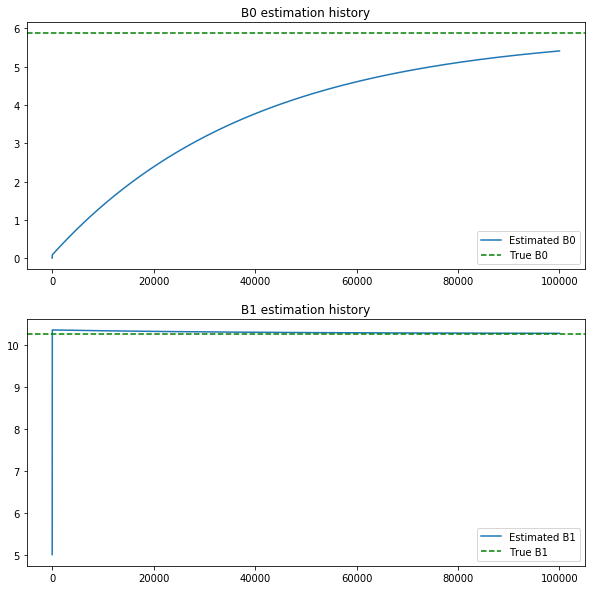

In [103]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(range(len(loss_history)), [i[0] for i in B_history],
        label='Estimated B0')
ax[0].axhline(coeff0, linestyle='--', c='green', label ='True B0')
ax[0].set_title('B0 estimation history')
ax[0].legend();

ax[1].plot(range(len(loss_history)), [i[1] for i in B_history],
        label='Estimated B1')
ax[1].axhline(coeff1, linestyle='--', c='green', label ='True B1')
ax[1].set_title('B1 estimation history')
ax[1].legend();

## Measuring Quality of Fit

The core goal of predictive machine learning is, given a data set, to build a predictive model that, in either the classification or regression setting, generates predictions that accurately reflect the true response for the data. In the regression setting, the *mean squared error* (MSE) is often used as a measure of goodness of fit:

$$
MSE = \frac{1}{n}\sum_{i=1}^{n}\left(y_i - \hat{f}\left(x_i\right)\right)^2,
$$
where $y_i$ is the true observed response and $\hat{f}\left(x_i\right)$ is the machine learning model $\hat{f}$'s prediction for the *i*th observation. This is a sensible loss function, intuitively speaking, because the MSE will be very small when the predicted responses are close to the true responses, and will grow and the predicted responses stray away from the true responses.

The MSE is first calculated using the training data that was used to fit the model, and is more accurately referred to as the *training set MSE*. One of the key objectives for machine learning, however, is the ability of a model to generalise. That is, to accurately model the true underlying signal in the data rather than an *sample specific variability in a given training set*. A key way in which the ability of a model to generalize is measured is by testing the accuracy of the model's predictions on previously unseen test data.

For instance, consider the following scenario: We can use these patients to train a machine learning method to predict risk of diabetes based on clinical measurements. In
practice, we want this method to accurately predict diabetes risk for future
patients based on their clinical measurements. We are not very interested
in whether or not the method accurately predicts diabetes risk for patients
used to train the model, since we already know which of those patients
have diabetes.

In other words, we are interested in a model that gives the **lowest test set MSE as opposed to the lowest training set MSE**.

Lets step through these concepts in the context of some specific data.

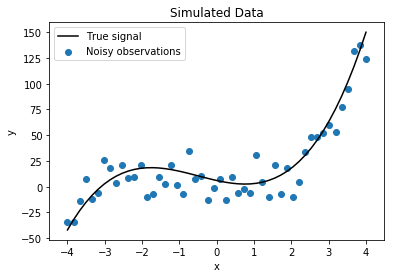

In [101]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 

# set the seed for the random number generator
# so we all work with the same data
np.random.seed(42)

def cubic_generator(x):
    """
    f(x) = 2x**3 + 3x**2 - 8x + 6
    
    :param x: x-coordinate 
    :returns: x mapped through a cubic function
    """
    return 2*x**3 + 3*x**2 - 8*x + 6

# vectorize the func so it accepts array inputs
cubic_generator = np.vectorize(cubic_generator)

# generate xcoords, the true target and noisy observations on the target
xcoords = np.linspace(-4, 4, 50)
ycoords = cubic_generator(xcoords)
noise = np.random.normal(scale=15, size=50)

# plotting
plt.plot(xcoords, ycoords, c='black')
plt.scatter(xcoords, ycoords + noise)
plt.title('Simulated Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['True signal', 'Noisy observations']);

Lets step through fitting a linear approximator to the underlying data. First we'll generate a slightly richer training set (i.e. more observations).

In [107]:
# we'll use 1000 observations in total
x = np.linspace(-4, 4, 1000)
random_noise = np.random.normal(scale=15, size=1000)
y = x + random_noise

Next we'll split the data into a training set and a test set for evaluation. Though there aren't hard-and-fast rules for exact ratios, you typically want to train on as much of the data as possible, while retaining a non-negligible test set. We'll use quite a typical ratio: 80% train and 20% test.

In [108]:
# choose the set of train indices, and derive the test indices
train_indices = np.random.choice(range(1000), replace=False, size = int(0.8*1000))
test_indices = [idx for idx in range(1000) if idx not in train_indices]

# split the data
# the reshape operation is necessary because the machine learning models
# in general expect 2D tensors
x_train = x[train_indices].reshape(-1, 1)
y_train = y[train_indices]
x_test = x[test_indices].reshape(-1, 1)
y_test = y[train_indices]

Next we'll use the `Scikit-learn` package to fit the linear approximator. It has a super intuitive API which is very consistent across many different modelling approaches. You'll be well acquainted soon!

In [109]:
from sklearn.linear_model import LinearRegression

# create a linear regression object
linear_reg = LinearRegression()

# fit the object on training data
linear_reg = linear_reg.fit(X=x_train, y=y_train)

# training set predictions
train_preds = linear_reg.predict(x_train)

# test set predictions
test_preds = linear_reg.predict(x_test)

We can visualize the learned linear approximator relative to the true signal and noisy observations:

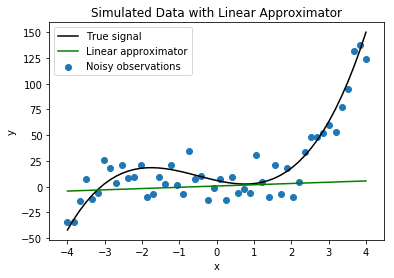

In [111]:
# plot the linear approximator using the xcoords and the attributes
# of the fitted linear model
linear_ycoords = linear_reg.coef_ * xcoords + linear_reg.intercept_

plt.plot(xcoords, ycoords, c='black')
plt.plot(xcoords, linear_ycoords, c='green')
plt.scatter(xcoords, ycoords + noise)
plt.title('Simulated Data with Linear Approximator')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['True signal', 'Linear approximator', 'Noisy observations'])

**Exercise: bias and variance trade-off.** Fit polynomial approximators of degree 3 and degree 6 to the simulated data. For all approximators, including the linear approximator just fitted, calculate the train and test MSE. 

Plot the approximators on the plotting subset, and separately plot the train and test set MSEs for each approximator. What patterns do you notice?

**Hint:** For the polynomial approximators, see `PolynomialFeatures` in `sklearn.preprocessing`.

## Classification and Decision Boundaries

In contrast to the regression setting, in practice we are often interested in predicting a response that is categorical rather than continuous. In this setting, a common approach to quantifying the accuracy of an estimator is assessing the *error rate* of the classifier: that is, the proportion of misclassified (test or training) data points:

$$
\frac{1}{n}\sum_{i=1}^{n}I\left(y_i\neq\hat{y}_i\right),
$$

where $y_i$ and $\hat{y}_i$ are respectively the true class and the predicted class for the $i$th observation, and $I\left(y_i\neq\hat{y}_i\right)$ is an indicator variable that equals 1 when $y_i=\hat{y}_i$ and 0 otherwise.

It turns out that, speaking in terms of probabilities, the classifier that minimizes the test error rate is the classifier that assigns each observation $x$ to the class $j$ which attains the largest value of:
$$
\Pr\left(Y=j\;|\;X=x\right),
$$

that is, the class $j$ with the highest conditional probability given the observation $x$. Of course, with real-world data, the conditional distribution of the response classes given the features is unknown and often highly complex. In practice, we use algorithms.

## K-Nearest Neighbours
K-nearest neighbours (KNN) is a simple approach that classifies each observation to the class with the highest *estimated probability*. The probability is estimated quite naively: given some choice of a positive integer $K$ and a test observation $x_0$, the classifier identifies the $K$ training observations nearest to point $x_0$, represented by $\mathcal{N}_0$, and estimates the conditional probability of class $j$ as the proportion of points in $\mathcal{N}_0$ with response values $j$:
$$
\Pr\left(Y=j\;|\;X=x_0\right) = \frac{1}{K}\sum_{i\in\mathcal{N}_0}I\left(y_i=j\right).
$$
The classifier then classifies the test observation $x_0$ to the class with the highest probability.

Lets explore K-nearest neighbours classification in the context of a two-class classification problem (related to breast cancer diagnosis):

In [121]:
%matplotlib inline
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# by default the cancer data is loaded as a special Numpy object.
# for convenience we'll convert it into a Pandas dataframe
cancer_bunch = load_breast_cancer()

colnames = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
'mean smoothness', 'mean compactness', 'mean concavity',
'mean concave points', 'mean symmetry', 'mean fractal dimension',
'radius error', 'texture error', 'perimeter error', 'area error',
'smoothness error', 'compactness error', 'concavity error',
'concave points error', 'symmetry error', 'fractal dimension error',
'worst radius', 'worst texture', 'worst perimeter', 'worst area',
'worst smoothness', 'worst compactness', 'worst concavity',
'worst concave points', 'worst symmetry', 'worst fractal dimension',
'target']

df = pd.DataFrame(np.column_stack((cancer_bunch['data'], cancer_bunch['target'])),
                  columns=colnames)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


Since the target column is the last column, and all other columns are continuous, we split the feature observations and the response simply:

In [124]:
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

We're going to use a linear dimensionality-reduction technique called Principal Component Analysis (PCA)to represent the 30-dimensional feature space in 2-dimensions.

We'll go into more detail on this at a later stage in the course, but briefly, PCA finds a new coordinate system for the feature space such that the first coordinate in this system represents the direction which accounts for the greatest proportion of variance in the feature space, the 2nd coordinate represents the direction which accounts for the second greatest proportion of variance in the feature space, and so on.

This method allows us to capture a significant proportion of the variation in the feature space in a space of much lower dimension.

**Important note:** Before PCA, it's important to scale the data. Since PCA finds components that maximize variance, without scaling it is biased towards features with larger scales (and therefore often significantly higher variance on average before normalisation). If you're interested, check out what happens when you remove the normalisation step from the code.

In [134]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaled_features = StandardScaler().fit_transform(X)
pca = PCA(n_components=2).fit_transform(scaled_features)

Sk-learn exposes a very simple utility function for splitting features and labels into training and test sets:

In [135]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)

Lets visualize the class distribution in the space of the first two principal components:

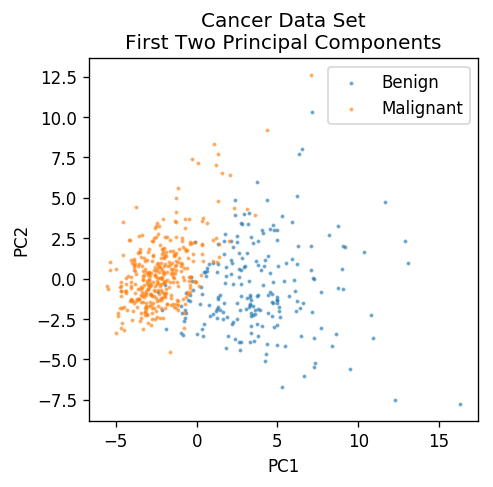

In [136]:
plt.figure(dpi=120)
plt.scatter(pca[y==0,0], pca[y==0,1], alpha=0.5, label='Benign', s=2)
plt.scatter(pca[y==1,0], pca[y==1,1], alpha=0.5, label='Malignant', s=2)
plt.legend()
plt.title('Cancer Data Set\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')

**Exercise: KNN and decision boundaries** Train a KNN classifier on the first two principal components, and use the below utility code to visualise the resulting decision boundaries. Explore the effects of different choices of the $K$ parameter, and find the value of $K$ that maximizes the test set accuracy.

In [137]:
def plot_twoclass_boundary(X, y, fitted_model):
    """
    Plots a set of observations with associated two-class response values, along with the 
    decision boundaries and decision probabilities derived from a fitted model.
    
    :param X: set of feature observations
    :param y: true response values for the observations
    :param fitted_model: fitted sklearn model object
    :returns: None
    """

    plt.figure(figsize=(9.8,5), dpi=100)
    
    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
        plt.subplot(1,2,i+1)

        mesh_step_size = 0.01  # step size in the mesh
        # find the left-most and right-most points
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        # find the top-most and bottom-most points
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        # tuple of x and y coordinates at each of the grid points
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
        if i == 0:
            # predict actual response for decision boundaries
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                # predict the probabilities
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break
        # reshape model predictions into grid shape
        Z = Z.reshape(xx.shape)
        # plot y == 0
        plt.scatter(X[y.values==0,0], X[y.values==0,1], alpha=0.4, label='y == 0', s=5)
        #plot y == 1
        plt.scatter(X[y.values==1,0], X[y.values==1,1], alpha=0.4, label='y == 1', s=5)
        plt.legend()
        # overlay the model predictions as colouration over the whole grid
        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                   extent=(x_min, x_max, y_min, y_max), origin='lower')
        plt.title(plot_type + '\n' + 
                  str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
        plt.gca().set_aspect('equal');
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)